In [18]:
import pandas as pd
import openpyxl as xl
import csv as csv
import os as os
import matplotlib.pyplot as plt
import numpy as np


In [19]:
#import excel file with erp_per_lga
excel_file ='Data/Q2_Rebased_2021_ERP_2006_2021.xlsx'
erp_vic = pd.read_excel(excel_file, 'Table 1')
erp_vic_df = pd.DataFrame(erp_vic)
erp_vic_df.head()

,Unnamed: 0,Unnamed: 1,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,10050,Albury,45265.0,45816.0,46180.0,46505.0,47004.0,47566.0,48140.0,48518.0,...,49785.0,50338.0,50990.0,51486.0,52171.0,53023.0,53857.0,54567.0,55350.0,56036.0
1,10180,Armidale Regional,27906.0,27774.0,27610.0,27410.0,27350.0,27377.0,27468.0,27788.0,...,28748.0,28895.0,29015.0,29160.0,29310.0,29504.0,29604.0,29663.0,29551.0,29332.0
2,10250,Ballina,37856.0,38417.0,38870.0,39120.0,39305.0,39537.0,39824.0,40020.0,...,41118.0,41510.0,41881.0,42336.0,42993.0,43626.0,44333.0,44927.0,45569.0,46172.0
3,10300,Balranald,2751.0,2703.0,2661.0,2596.0,2545.0,2507.0,2473.0,2433.0,...,2363.0,2381.0,2376.0,2364.0,2330.0,2336.0,2305.0,2283.0,2252.0,2207.0
4,10470,Bathurst Regional,35504.0,35831.0,36084.0,36245.0,36547.0,36916.0,37272.0,37904.0,...,40301.0,40727.0,41157.0,41694.0,42244.0,42558.0,42834.0,43137.0,43355.0,43653.0


In [20]:

#define function to caculate compound annual growth rate
def calculate_cagr(start_value, end_value, period):
    return(end_value / start_value)**(1/period)-1

#add new column and using assign() and calculate average growth

erp_vic_df = erp_vic_df.assign(cagr = calculate_cagr(erp_vic_df.iloc[:,2], erp_vic_df.iloc[:,7 ], period=5))
#rename first 2 columns and the column headed cagr and fornmat the column


erp_vic_df = erp_vic_df.rename(columns = {'Unnamed: 0': 'abs_code', 'Unnamed: 1':'lga', 'cagr' : 'annual_growth %'})
erp_vic_df['annual_growth %']= erp_vic_df['annual_growth %'].astype(float)
erp_vic_df['annual_growth %']= erp_vic_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
erp_vic_df.head()

,abs_code,lga,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,annual_growth %
0,10050,Albury,45265.0,45816.0,46180.0,46505.0,47004.0,47566.0,48140.0,48518.0,...,50338.0,50990.0,51486.0,52171.0,53023.0,53857.0,54567.0,55350.0,56036.0,1.00%
1,10180,Armidale Regional,27906.0,27774.0,27610.0,27410.0,27350.0,27377.0,27468.0,27788.0,...,28895.0,29015.0,29160.0,29310.0,29504.0,29604.0,29663.0,29551.0,29332.0,-0.38%
2,10250,Ballina,37856.0,38417.0,38870.0,39120.0,39305.0,39537.0,39824.0,40020.0,...,41510.0,41881.0,42336.0,42993.0,43626.0,44333.0,44927.0,45569.0,46172.0,0.87%
3,10300,Balranald,2751.0,2703.0,2661.0,2596.0,2545.0,2507.0,2473.0,2433.0,...,2381.0,2376.0,2364.0,2330.0,2336.0,2305.0,2283.0,2252.0,2207.0,-1.84%
4,10470,Bathurst Regional,35504.0,35831.0,36084.0,36245.0,36547.0,36916.0,37272.0,37904.0,...,40727.0,41157.0,41694.0,42244.0,42558.0,42834.0,43137.0,43355.0,43653.0,0.78%


In [21]:
#import excel file with gp_full_time_equivalent per remote area classification

excel_file ='Data/Q2_summary2_GPs for Victoria.xlsx'
gptfe = pd.read_excel(excel_file,'gptfe')
gptfe_vic_df = pd.DataFrame(gptfe)
gptfe_vic_df

,Unnamed: 0,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,5-year CAGR
0,MM1,5144.3,5353,5602.3,5798.1,5942.4,5970.2,6449.5,0.037972
1,MM2,413.3,430.1,443.2,447.6,448.2,473.9,510.5,0.034869
2,MM3,397.7,400,398.8,398.5,394.5,403.8,416,0.007875
3,MM4,344.7,352,368.1,375.3,386.2,399.8,416.7,0.034323
4,MM5,291.1,294.3,302.5,311.1,314.7,327.9,347,0.033494
5,MM6,2.7,2.2,2.3,2.8,2.7,3,3.2,0.077818
6,GP FULL TIME EQUIVALENT (GPFTE),6593.8,6831.6,7117.2,7333.2,7488.7,7578.7,8143,0.035744
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,NaN
9,NaN,MM1,4.056917,4.657202,3.494993,2.488746,0.467824,8.028207,NaN


In [22]:
gptfe_vic_df = gptfe_vic_df.rename(columns = {'Unnamed: 0':  'classification'} )
gptfe_vic_df = gptfe_vic_df.rename(columns = {'5-year CAGR' : 'annual_growth %'})
gptfe_vic_df['annual_growth %']= gptfe_vic_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))


gptfe_vic_df.head(5) 

,classification,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,annual_growth %
0,MM1,5144.3,5353,5602.3,5798.1,5942.4,5970.2,6449.5,3.80%
1,MM2,413.3,430.1,443.2,447.6,448.2,473.9,510.5,3.49%
2,MM3,397.7,400,398.8,398.5,394.5,403.8,416,0.79%
3,MM4,344.7,352,368.1,375.3,386.2,399.8,416.7,3.43%
4,MM5,291.1,294.3,302.5,311.1,314.7,327.9,347,3.35%


In [23]:
excel_file ='Data/Q2_summary2_GPs for Victoria.xlsx'
gp_service = pd.read_excel(excel_file,'gp_service')
gp_service_df = pd.DataFrame(gp_service)
gp_service_df = gp_service_df.dropna(how ='any')
gp_service_df = gp_service_df.rename(columns = {'5-year CAGR' : 'annual_growth %'})
gp_service_df['annual_growth %']= gp_service_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
gp_service_df

,Service type,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,annual_growth %
0,Non-referred attendances GP/VR GP ...,32164983.0,33176743.0,34464453.0,35337673.0,36994524.0,39312579.0,45315453.0,6.43%
1,Non-referred attendances - Other ...,2096755.0,2038317.0,1882286.0,1912670.0,1785713.0,1559100.0,1319826.0,-8.33%
2,Specialist attendances ...,93107.0,88259.0,86778.0,90576.0,76674.0,73083.0,71413.0,-4.15%
3,Obstetrics ...,140190.0,139781.0,145806.0,154671.0,147472.0,154448.0,127610.0,-1.81%
4,Anaesthetics ...,84344.0,80933.0,80266.0,84497.0,72355.0,71939.0,69573.0,-2.98%
5,Pathology Tests ...,130168.0,126524.0,127237.0,121523.0,104039.0,72817.0,58210.0,-14.38%
6,Diagnostic Imaging ...,4584.0,4194.0,3901.0,3286.0,2846.0,1599.0,1663.0,-16.89%
7,Operations ...,550119.0,556362.0,583069.0,575289.0,530085.0,555522.0,517917.0,-1.42%
8,Assistance at Operations ...,2624.0,2769.0,2459.0,2861.0,2619.0,2751.0,2355.0,-3.19%
10,Other MBS Services ...,227898.0,237933.0,245638.0,252140.0,242387.0,163962.0,165907.0,-6.96%


In [24]:
excel_file ='Data/Q2_summary2_GPs for Victoria.xlsx'
sevice_region = pd.read_excel(excel_file,'sevice_region')
service_region_df = pd.DataFrame(sevice_region)
service_region_df = service_region_df.dropna(how ='any')
service_region_df = service_region_df.rename(columns = {'area type':'clssification', 'cagr' : 'annual_growth %'})
service_region_df['annual_growth %']= service_region_df['annual_growth %'].astype(float)
service_region_df['annual_growth %'] = service_region_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
service_region_df

,clssification,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,annual_growth %
0,MM1,29969009,31026450,32322055,33350096,34720441,36354701,40808415,5.63%
1,MM2,2390882,2461693,2522969,2539935,2584655,2836821,3129795,4.92%
3,MM4,NP,2061870,2139383,2164996,2270140,2445436,2644810,5.11%
4,MM5,1662770,1672936,1701753,1733290,1774722,1925885,2158443,5.23%


In [25]:
excel_file ='Data/Q2_summary2_GPs for Victoria.xlsx'
patient_age = pd.read_excel(excel_file,'patient_age', skiprows = 6)
patient_age_df = pd.DataFrame(patient_age)
#patient_age_df = patient_age_df.dropna(how ='any')
#patient_age_df.rename(columns = patient_age_df.iloc(0))
#patient_age_df = patient_age_df.drop([0])

patient_age_df

,Age,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,cagr
0,00 - 04,321.4,332.8,342.4,352.1,321.4,273.3,288.1,-0.028435
1,05 - 09,194.9,201.3,208.9,212.1,208.0,152.8,187.0,-0.014629
2,10 - 14,156.4,163.0,170.2,173.4,170.8,151.7,188.4,0.029387
3,15 - 19,223.9,225.9,232.3,232.1,229.1,226.4,265.0,0.032443
4,20 - 24,314.3,319.1,322.3,323.7,321.9,315.4,344.0,0.015141
5,25 - 34,861.6,889.9,921.6,946.3,961.8,960.8,1038.1,0.031287
6,35 - 44,840.4,862.4,897.8,929.2,956.1,979.4,1094.3,0.048783
7,45 - 54,870.9,897.3,930.7,943.5,955.1,985.3,1043.4,0.030630
8,55 - 64,878.1,909.4,952.6,973.2,992.5,1042.4,1092.8,0.037426
9,65 - 74,866.9,911.9,964.8,998.8,1033.2,1106.8,1153.8,0.048182


In [26]:

patient_age_df = patient_age_df.rename(columns = {'cagr' : 'annual_growth %'})
patient_age_df['annual_growth %']= patient_age_df['annual_growth %'].astype(float)
patient_age_df['annual_growth %'] = patient_age_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
patient_age_df

,Age,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,annual_growth %
0,00 - 04,321.4,332.8,342.4,352.1,321.4,273.3,288.1,-2.84%
1,05 - 09,194.9,201.3,208.9,212.1,208.0,152.8,187.0,-1.46%
2,10 - 14,156.4,163.0,170.2,173.4,170.8,151.7,188.4,2.94%
3,15 - 19,223.9,225.9,232.3,232.1,229.1,226.4,265.0,3.24%
4,20 - 24,314.3,319.1,322.3,323.7,321.9,315.4,344.0,1.51%
5,25 - 34,861.6,889.9,921.6,946.3,961.8,960.8,1038.1,3.13%
6,35 - 44,840.4,862.4,897.8,929.2,956.1,979.4,1094.3,4.88%
7,45 - 54,870.9,897.3,930.7,943.5,955.1,985.3,1043.4,3.06%
8,55 - 64,878.1,909.4,952.6,973.2,992.5,1042.4,1092.8,3.74%
9,65 - 74,866.9,911.9,964.8,998.8,1033.2,1106.8,1153.8,4.82%


In [27]:
excel_file ='Data/Q2_pop_remoteness.xlsx'
pop_remoteness = pd.read_excel(excel_file)
pop_remoteness_df = pd.DataFrame(pop_remoteness)
pop_remoteness_df

,Unnamed: 0,Unnamed: 1,2016,2021,Unnamed: 4
0,MMS 1,Major cities,4376630,4779726,403096
1,MMS 2,Inner Regional,1111740,1313162,201422
2,MMS 3,Outer Regional,242899,247603,4704
3,MMS 4,Remote,3352,3564,212


In [28]:
pop_remoteness_df = pop_remoteness_df.rename(columns = {'Unnamed: 0': 'classification', 
                                              'Unnamed: 1' : 'area_type',
                                              'Unnamed: 4': 'difference'})
pop_remoteness_df = pop_remoteness_df.assign(cagr = calculate_cagr(pop_remoteness_df.iloc[:,3], pop_remoteness_df.iloc[:,2 ], period=5))
pop_remoteness_df = pop_remoteness_df.rename(columns = {'cagr' : 'annual_growth %'})
pop_remoteness_df['annual_growth %']= pop_remoteness_df['annual_growth %'].astype(float)
pop_remoteness_df['annual_growth %'] = pop_remoteness_df['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
pop_remoteness_df


,classification,area_type,2016,2021,difference,annual_growth %
0,MMS 1,Major cities,4376630,4779726,403096,-1.75%
1,MMS 2,Inner Regional,1111740,1313162,201422,-3.28%
2,MMS 3,Outer Regional,242899,247603,4704,-0.38%
3,MMS 4,Remote,3352,3564,212,-1.22%


In [29]:
excel_file ='Data/Q2_summary2_GPs for Victoria.xlsx'
patient_nos = pd.read_excel(excel_file,'patient_nos')

In [30]:
def calculate_cagr(start_value, end_value, period):
    return(end_value / start_value)**(1/period)-1

#add new column and using assign() and calculate average growth

patient_nos = patient_nos.assign(cagr = calculate_cagr(patient_nos.iloc[:,2], patient_nos.iloc[:,7 ], period=5))
#rename first 2 columns and the column headed cagr and fornmat the column


patient_nos = patient_nos.rename(columns = {'cagr' : 'annual_growth %'})
patient_nos['annual_growth %']= patient_nos['annual_growth %'].astype(float)
patient_nos['annual_growth %']= patient_nos['annual_growth %'].apply(lambda x: '{:,.2%}'.format(x))
patient_nos.head()

,age,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,2021/22,annual_growth %
0,00 - 04,416339,423143,427787,427915,423795,390830,397723,-1.23%
1,05 - 09,344329,351163,362488,372547,375028,321924,368289,0.96%
2,10 - 14,295441,303808,315053,326234,331376,296926,365906,3.79%
3,15 - 19,324290,324537,328405,329285,328657,310532,364539,2.35%
4,20 - 24,372160,374676,376839,377266,373647,345104,379467,0.25%


In [31]:
excel_file ='Data/Q2_Primary_health_medicare_vic.xlsx'
medicare_attend = pd.read_excel(excel_file,'attend_per_person')
medicare_attend_df = pd.DataFrame(medicare_attend)
medicare_attend_df = medicare_attend_df.set_index('lga')
#avg = medicare_attend_df.iloc[:,-5:].mean(axis=1)
#medicare_attend_df['Average(5-years)'] = avg
medicare_attend_df

,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
lga,,,,,,,
Ballarat,4.7,5.0,5.0,5.3,5.8,5.8,5.9
Creswick - Daylesford - Ballan,4.8,5.1,5.2,5.3,5.5,5.6,5.5
Maryborough - Pyrenees,5.2,5.3,5.0,5.2,5.6,5.8,5.5
Bendigo,4.8,4.9,5.1,5.4,5.5,5.7,5.7
Heathcote - Castlemaine - Kyneton,5.0,5.1,5.2,5.4,5.5,5.7,5.6
...,...,...,...,...,...,...,...
Campaspe,4.8,5.0,5.4,5.9,6.4,6.6,6.2
Moira,5.1,5.2,5.4,5.6,5.9,6.2,6.1
Shepparton,5.1,5.6,6.1,6.5,6.9,7.1,6.9


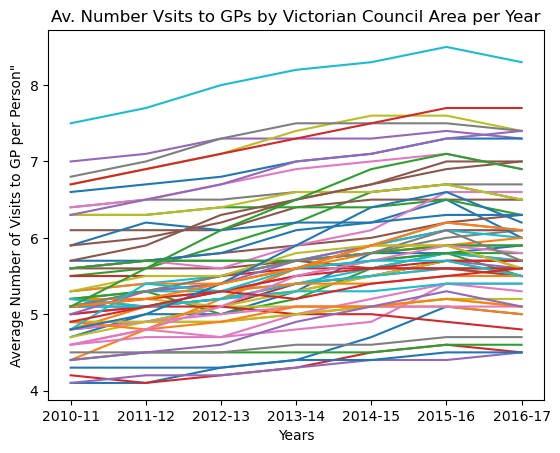

In [32]:
fig, ax=plt.subplots()
medicare_attend1_df  = medicare_attend_df.T
medicare_attend1_df.plot(kind='line', ax=ax, legend = False)
plt.xlabel('Years')
plt.ylabel('Average Number of Visits to GP per Person"')
ax.set_title('Av. Number Vsits to GPs by Victorian Council Area per Year')
plt.show()

In [33]:
#scatter plot and regression
# if 'level_0' in medicare_attend1_df.columns:
#     medicare_attend1_df = medicare_attend1_df.rename(columns={'level_0': 'year'})


# plt.scatter(list(medicare_attend1_df['index']), list(medicare_attend1_df[0]))

# plt.xlabel('Year')
# plt.ylabel('Average Number of Visits per Patient')
# plt.title('Increase in Visitis per Ptient Over Time')
# plt.show()

In [34]:
excel_file ='Data/Q2_Primary_health_medicare_vic.xlsx'
summary_attend = pd.read_excel(excel_file,'summary_city')
#avg = summary_attend.iloc[:,-5:].mean(axis=1)
#summary_attend['Average(5-years)'] = avg
summary_attend = summary_attend.set_index('Geog')

summary_attend

,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
Geog,,,,,,,
Greater Melbourne,5.6,5.70,5.7,5.9,6.00,6.1,6.00
Wyndham,6.5,6.70,7.0,7.1,7.30,7.4,7.10
Casey,6.6,6.75,7.0,7.2,7.25,7.3,7.15
Cardinia,5.9,6.00,6.2,6.5,6.70,6.9,7.00
Whittlesea,7.0,7.10,7.3,7.3,7.30,7.4,7.30
Hume,6.3,6.30,6.4,6.5,6.50,6.6,6.40
Melton,6.7,6.90,7.1,7.3,7.50,7.7,7.70


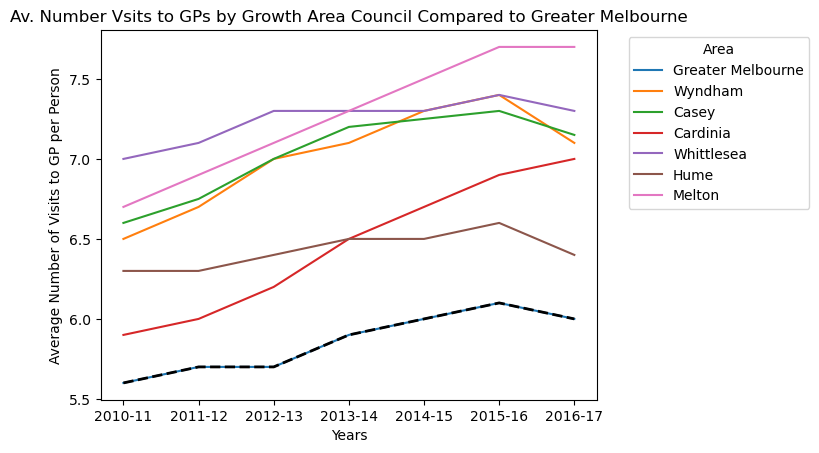

In [35]:
fig1, ax=plt.subplots()
summary_attend_df  = summary_attend.T
summary_attend_df.plot(kind='line', ax=ax)
plt.xlabel('Years')
plt.ylabel('Average Number of Visits to GP per Person')
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Av. Number Vsits to GPs by Growth Area Council Compared to Greater Melbourne')
ax.plot(summary_attend_df.index, summary_attend_df['Greater Melbourne'], color = 'black', linestyle = '--', linewidth = 2)
plt.show()

In [36]:
excel_file ='Data/Q2_summary2_GPs for Victoria.xlsx'
GPTFE_per_person = pd.read_excel(excel_file,'totals')

GPTFE_per_person=GPTFE_per_person.set_index('Area type')
GPTFE_per_person

,2015,2016,2017,2018,2019,2020,2021
Area type,,,,,,,
Victoria,109.5,110.7,112.6,113.5,113.5,113.2,124.4
Metropolitan areas,110.5,111.8,113.9,115.1,115.3,114.2,128.1
Regional centres,103.0,104.4,105.2,103.6,100.8,103.6,106.6
Large rural towns,131.5,131.0,129.6,128.6,126.4,128.5,129.7
Medium rural towns,130.1,130.7,135.0,135.9,138.0,141.0,143.8
Small rural towns,73.9,74.1,75.8,77.4,77.7,80.3,82.8
Remote communities,83.8,67.9,73.7,88.1,86.1,96.7,98.1


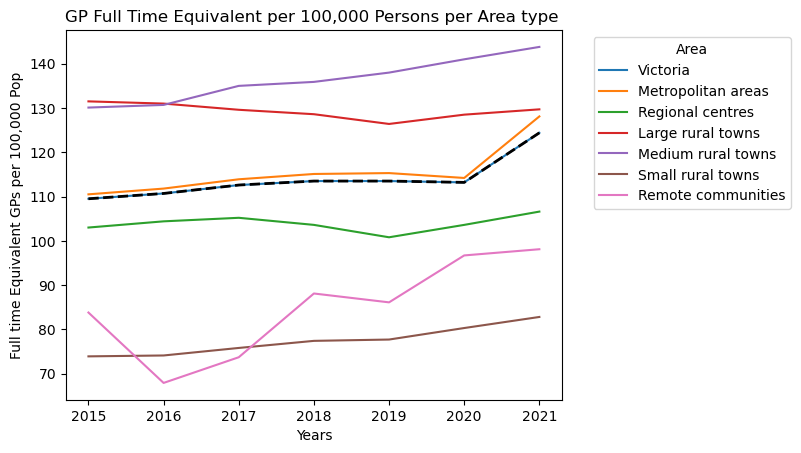

In [37]:
fig2, ax=plt.subplots()
GPTFE_per_person1  = GPTFE_per_person.T
GPTFE_per_person1.plot(kind='line', ax=ax)
plt.xlabel('Years')
plt.ylabel('Full time Equivalent GPs per 100,000 Pop')
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('GP Full Time Equivalent per 100,000 Persons per Area type ')
ax.plot(GPTFE_per_person1.index, GPTFE_per_person1['Victoria'], color = 'black', linestyle = '--', linewidth = 2)
plt.show()